## Task: Train an EMNIST classifier

EMNIST (or extended MNIST) is just like MNIST, a bunch of handwritten images, except instead of just digits (0-9) it also has uppercase and lowercase characters.

You are provided with the code to load the EMNIST train and split **datasets**

Write and train a classifier for EMNIST. Make sure to

- Show how your loss(es) dropped during training.
- Show final performance of your model on untrained data.
- Maintain good code quality.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

import torchvision
from torchvision.datasets import EMNIST
import torchvision.transforms.functional as F
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

In [ ]:
train_data = EMNIST(root='emnist_data/', split='byclass', download=True)
test_data = EMNIST(root='emnist_data/', split='byclass', download=True, train=False)

Number of classes in dataset: 62
Unique labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
7


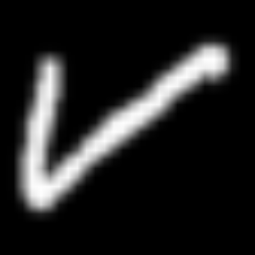

In [ ]:
# This cell is for demo purposes. feel free to remove it if you want.
print('Number of classes in dataset:', len(train_data.classes))
print('Unique labels:', train_data.classes)

demo_img, demo_label = train_data[10]

print(demo_label)
torchvision.transforms.functional.resize(demo_img, (255, 255))

In [ ]:
# Transformations for the EMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the datasets
train_data = EMNIST(root='emnist_data/', split='byclass', train=True, download=True, transform=transform)
test_data = EMNIST(root='emnist_data/', split='byclass', train=False, download=True, transform=transform)

# Define the size of the subset as a fraction of the original dataset
subset_fraction = 0.1 ## You can play with this to get a bigger or smaller subset

# Create indices for the training subset
train_indices = np.random.choice(len(train_data), int(len(train_data) * subset_fraction), replace=False)

# Create the training subset
train_subset = Subset(train_data, train_indices)

# For the test set, you can do the same or use the full test set
test_indices = np.random.choice(len(test_data), int(len(test_data) * subset_fraction), replace=False)
test_subset = Subset(test_data, test_indices)

# Check the size of the subset
print(f"Training subset size: {len(train_subset)}")
print(f"Test subset size: {len(test_subset)}")

# Define the DataLoaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

Training subset size: 69793
Test subset size: 11632


In [19]:
next(iter(train_loader))[0][0].shape #check the size of image

torch.Size([1, 28, 28])

In [21]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512) #input layer and hidden layer
        self.fc2 = nn.Linear(512, 256)# from the prvousr layer that become input the next leyer and complate
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 62)# num classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=62, bias=True)
)


In [27]:
X=torch.rand((28*28))
X=X.view(-1,28*28)

In [28]:
output=net(X)

In [29]:
output # store NN with tensor in  output

tensor([[-4.0332e+01, -5.0587e+01, -4.0996e+01, -5.8549e+01, -6.6523e+01,
         -6.2153e+01, -3.4664e+01, -7.3829e+01, -3.2606e+01, -9.5325e+01,
         -5.3719e+01, -1.6604e-04, -6.3468e+01, -8.7034e+00, -4.7629e+01,
         -6.3724e+01, -3.1538e+01, -6.6897e+01, -3.7211e+01, -5.9643e+01,
         -6.2197e+01, -5.1452e+01, -4.6116e+01, -4.7959e+01, -3.2418e+01,
         -4.5006e+01, -3.5979e+01, -3.4485e+01, -3.3165e+01, -7.3719e+01,
         -2.1937e+01, -6.5602e+01, -2.8020e+01, -8.3145e+01, -6.0694e+01,
         -4.2056e+01, -4.0239e+01, -1.6712e+01, -7.4900e+01, -2.5327e+01,
         -7.7729e+01, -4.9012e+01, -5.1184e+01, -4.6631e+01, -6.9091e+01,
         -8.0718e+01, -6.2584e+01, -5.7229e+01, -5.7107e+01, -2.4704e+01,
         -5.4125e+01, -4.8958e+01, -5.8022e+01, -5.8686e+01, -6.4848e+01,
         -6.4438e+01, -7.3088e+01, -5.1094e+01, -5.8166e+01, -7.1748e+01,
         -7.7591e+01, -5.6372e+01]], grad_fn=<LogSoftmaxBackward0>)

In [30]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [31]:
for epoch in range(10): # 10 epoch
    for data in train_loader:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # before caculating the loss gradint are set zero
        output = net(X.view(-1,28*28))  # view reshapes to match in put size
        loss =F.nll_loss (output,y)  # the negative log likeihood loss is calculated bassed on the network output
        loss.backward()  # gradients are computed by backpropagation the loss through the network prameter
        optimizer.step()  #  update the network wight based on computed gradient
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines!

tensor(2.9909, grad_fn=<NllLossBackward0>)
tensor(0.3016, grad_fn=<NllLossBackward0>)
tensor(5.9605e-07, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(1.1921e-07, grad_fn=<NllLossBackward0>)
tensor(2.3842e-07, grad_fn=<NllLossBackward0>)
tensor(6.9616e-05, grad_fn=<NllLossBackward0>)
tensor(0., grad_fn=<NllLossBackward0>)
tensor(1.3113e-06, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)


In [32]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):

            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

m=round(correct/total, 3)
print("Accuracy: ", m)

Accuracy:  0.801


In [33]:
import matplotlib.pyplot as plt   # i make code to store loss in list to print the plot display loss
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
# Assuming your model, optimizer, and train_loader are defined

losses = []  # List to store loss values for each epoch

for epoch in range(10):
    for data in train_loader:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

    losses.append(loss.item())  # Append the loss value for the epoch



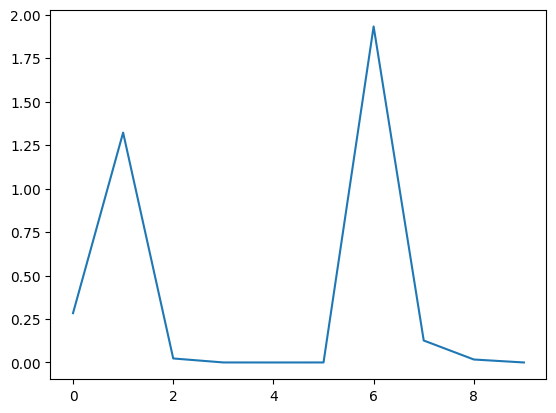

In [34]:
plt.plot(losses)
# to slove this problem remove  return F.log_softmax(x, dim=1) from build NN because the last layer cross entropy build soft max with it but no have time to run again